In [1]:
%load_ext autoreload
%autoreload 2

In [108]:
import jax
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt

from typing import NamedTuple
from functools import partial
import math
import json

In [109]:
import xylo
import xylo.types as t
import xylo.cut
import xylo.slicer as s

In [110]:
bar = t.BarProps(width = 0.038, depth = 0.019, length = 0.300, elements = 300, min_depth = 0.010)

'[0.038, 0.019, 0.3, 300, 0.01]'

In [115]:
with open('data/spline/59.json', 'r') as f:
  spline = jnp.array(json.load(f))
  print(spline)

[0.86181835 0.10249491 0.67961064 0.68944927 0.39092797 0.73175392]


In [123]:
# spline = [0.8618183457492242, 0.10249491254184383, 0.6796106365369823, 0.6894492655492203, 0.3909279734013816, 0.7317539174703496]
# spline = jnp.array([ 0.81393585, -0.00699588,  0.63882503,  0.65606331,  0.37536516, 0.79187227])
# spline = jnp.array([0.5, 0.3, 0.5, 1.0])

# sections = xylo.cut.spline(bar, spline)
sections = [xylo.cut.spline(bar, xylo.cut.spline_scale(spline, i)) for i in jnp.arange(0.2, 1.01, 0.2)]
# sections2 = xylo.cut.spline(bar, xylo.cut.spline_scale(spline, 0.5))

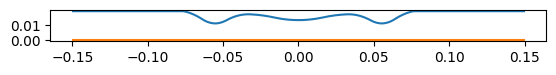

In [124]:
sections[-1].plot()
# sections2.plot()

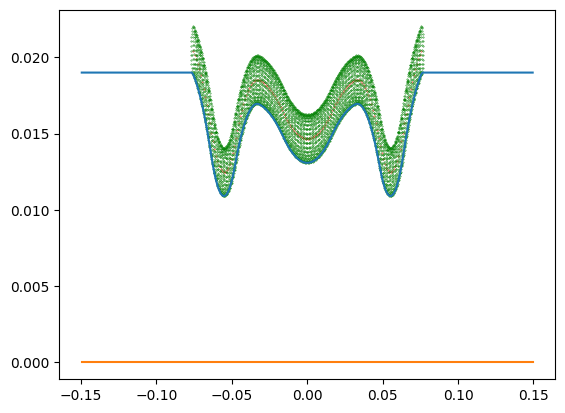

In [125]:
outlines = [s.slicer8.outline(bar, ss) for ss in sections]
# outline2 = s.slicer8.outline(bar, sections2)

# sizes = jnp.full_like(xs, 1)
s.slicer8.plot_outline(outlines[-1])

sections[-1].plot(to_scale = False)
# sections2.plot(to_scale = False)

In [161]:
prev = None
i = 0
for o in outlines:
  s.slicer8.path(bar, o, prev).write(f'data/gcode/b{int(bar.length*1000)}-{i}.ngc')
  prev = o
  i = i + 1

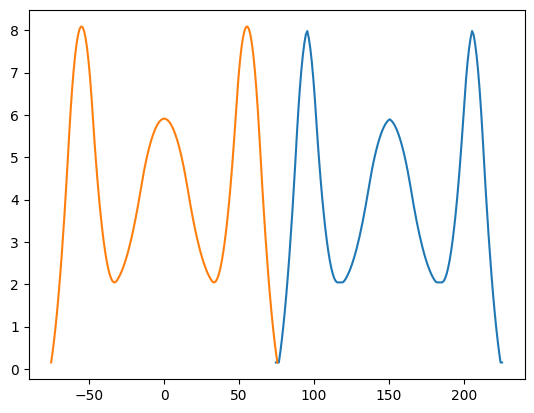

In [156]:
(dxs, dds, d0s) = s.slicer8.topdown_depths(bar, outlines[4])
plt.plot(dxs, dds)
plt.plot(outlines[4][0] * 1000, (bar.depth - outlines[4][1]) * 1000)

In [163]:
prev = None
i = 0
for o in outlines:
  s.slicer8.path_topdown(bar, o, prev).write(f'data/gcode/topdown-b{int(bar.length*1000)}-{i}.ngc')
  prev = o
  i = i + 1
